<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Secret_Santa_Circuit_Advanced_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
from google.colab import files as FILE

#plt.rcParams["figure.figsize"] = (15,10)

In [5]:
names = [
    'Liam', 'Sean', 'Cian', 'Finnian', 'Oisin', 'Darragh', 'Cormac', 'Eoin',
    'Saoirse', 'Aoife', 'Niamh', 'Ciara', 'Aisling', 'Roisin', 'Maeve', 'Brigid'
]

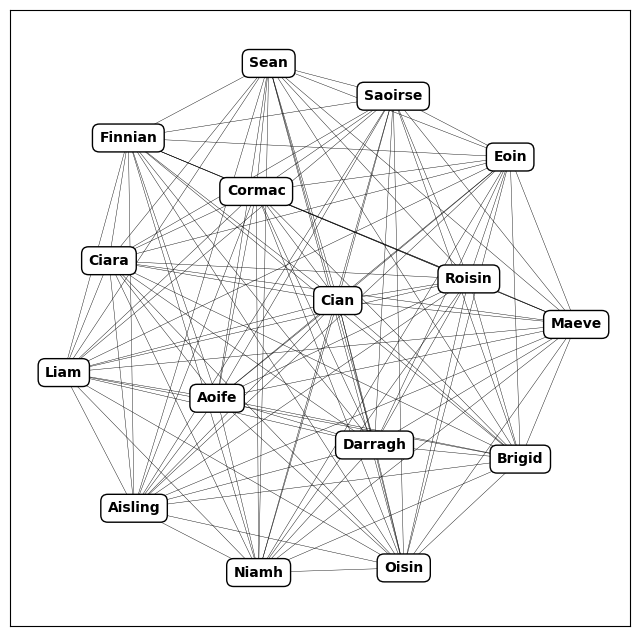

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
n = 16  # 10 nodes
m = 30  # 20 edges
seed = 2010  # seed random number generators for reproducibility
# Use seed for reproducibility
options = {
    "font_size": 10,
    "node_size": 300,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 0.3,
}
Ng = 6
N= 16
plt.figure(figsize=(8,8))
G = nx.gnm_random_graph(n, m, seed=seed)
G = nx.complete_graph(N)

pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw_networkx(G, pos, **options)

for i in range(N):
  plt.scatter(pos[i][0],pos[i][1], s= 200, c='w', zorder =2)
  text_content = names[i]
  plt.text(pos[i][0],pos[i][1], text_content, color='black', ha='center', va='center', fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

def distG(i,j):
  x1,y1 = pos[i][0],pos[i][1]
  x2,y2 = pos[j][0],pos[j][1]
  return int(1000*np.sqrt( (x1-x2)**2 +(y1-y2)**2))

connect = {}
for (i,j) in G.edges():
  connect[i,j] = distG(i,j)
  connect[j,i] = distG(i,j)



In [7]:


groups = {g:[] for g in range(Ng)}
selected = []

for i in range(N):
  g = random.randint(0,Ng-1)
  groups[g].append(i)



person_g = {n:g  for g,L in groups.items()  for n in L}
person_g,groups
for g,L in groups.items():
  A= [names[i] for i in L]
  print(f"group {g}", A)

group 0 ['Cian', 'Ciara']
group 1 ['Eoin']
group 2 ['Liam', 'Darragh', 'Aoife', 'Roisin']
group 3 ['Oisin', 'Aisling', 'Maeve', 'Brigid']
group 4 ['Sean', 'Finnian', 'Cormac', 'Saoirse', 'Niamh']
group 5 []


In [8]:
person_g

VV = {(i,j):abs(person_g[i]-person_g[j]) for (i,j),v in connect.items()}
VV = {(i,j):v for (i,j),v in connect.items()}


model = cp_model.CpModel()
solver = cp_model.CpSolver()
nodes = [n for n in G.nodes()]

U = {(i,j):model.NewBoolVar(f"connection_{i}_{j}")  for (i,j) in connect}

arcs = [(i,j,v) for (i,j),v in U.items() ]
model.AddCircuit(arcs)
# Maximize x
expressions = [v*VV[i,j] for (i,j),v in U.items() ]
model.Minimize(sum(expressions))
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("Optimal solutionis found")


Optimal solutionis found


{0: [2, 11],
 1: [7],
 2: [0, 5, 9, 13],
 3: [4, 12, 14, 15],
 4: [1, 3, 6, 8, 10],
 5: []}

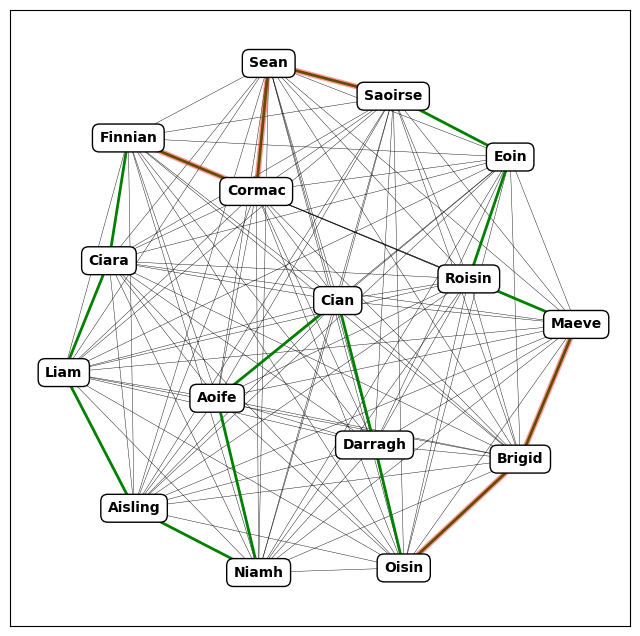

In [9]:
plt.figure(figsize=(8,8))

nx.draw_networkx(G, pos, **options)
for (i,j),v in U.items():
  if solver.Value(v)>0:
    x1,y1 = pos[i][0],pos[i][1]
    x2,y2 = pos[j][0],pos[j][1]
    plt.plot([x1,x2],[y1,y2],lw=2,c='g')



for (i,j),v in U.items():
  for g,L in groups.items():
    if i in L and j in L and solver.Value(v)>0:
      x1,y1 = pos[i][0],pos[i][1]
      x2,y2 = pos[j][0],pos[j][1]
      plt.plot([x1,x2],[y1,y2],lw=4,c='r', alpha=0.4, zorder =2)


for i in range(N):
  plt.scatter(pos[i][0],pos[i][1], s= 200, c='w', zorder =2)
  text_content = names[i]
  plt.text(pos[i][0],pos[i][1], text_content, color='black', ha='center', va='center', fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))



groups

Optimal solutionis found
Liam Finnian
Finnian Ciara
Ciara Cormac
Cormac Cian
Cian Sean
Sean Eoin
Eoin Saoirse
Saoirse Maeve
Maeve Roisin
Roisin Brigid
Brigid Darragh
Darragh Oisin
Oisin Niamh
Niamh Aoife
Aoife Aisling
Aisling Liam


{0: [2, 11],
 1: [7],
 2: [0, 5, 9, 13],
 3: [4, 12, 14, 15],
 4: [1, 3, 6, 8, 10],
 5: []}

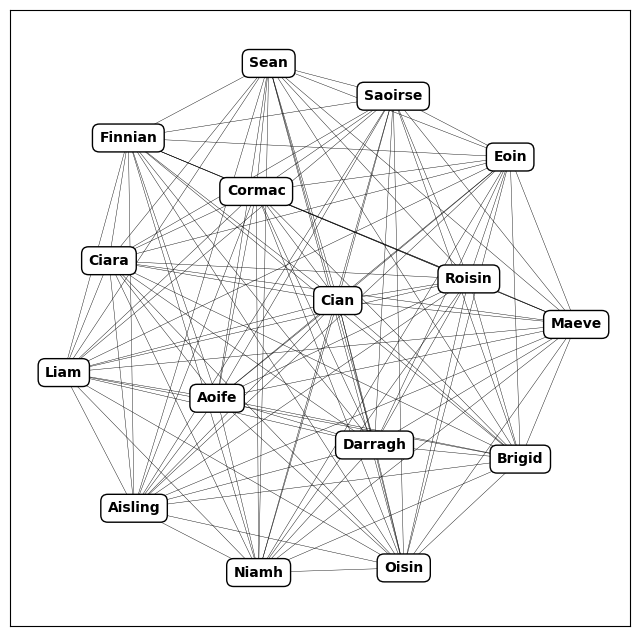

In [12]:
for (i,j),v in U.items():
  for g,L in groups.items():
    if i in L and j in L:
      model.Add(v==0)

model.Minimize(sum(expressions))
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("Optimal solutionis found")

plt.figure(figsize=(8,8))


nx.draw_networkx(G, pos, **options)

for i in range(N):
  plt.scatter(pos[i][0],pos[i][1], s= 200, c='w', zorder =2)
  text_content = names[i]
  plt.text(pos[i][0],pos[i][1], text_content, color='black', ha='center', va='center', fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

st_node = 0
for (i,j),v in U.items():
  if solver.Value(v)>0:
    x1,y1 = pos[i][0],pos[i][1]
    x2,y2 = pos[j][0],pos[j][1]
    plt.plot([x1,x2],[y1,y2],lw=3,c='r')
    print(names[i],names[j])



groups

Liam Finnian
Aisling Liam
Cian Sean
Sean Eoin
Cormac Cian
Finnian Ciara
Darragh Oisin
Oisin Niamh
Brigid Darragh
Ciara Cormac
Eoin Saoirse
Saoirse Maeve
Niamh Aoife
Aoife Aisling
Maeve Roisin
Roisin Brigid


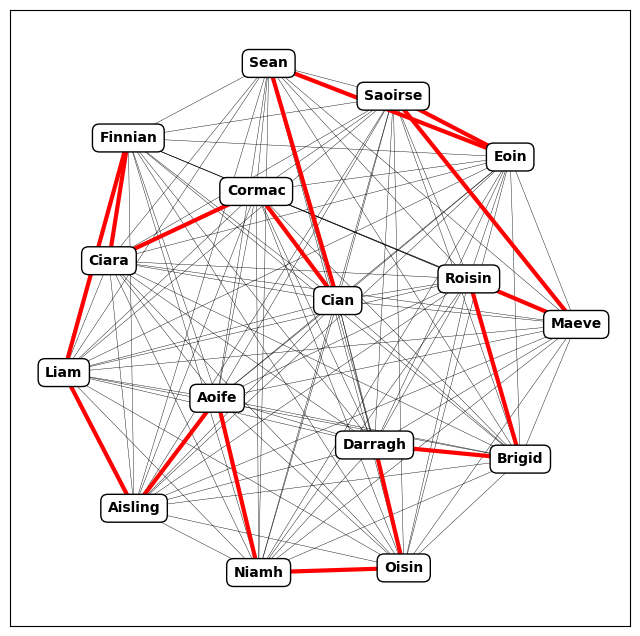

In [11]:

plt.figure(figsize=(8,8))

nx.draw_networkx(G, pos, **options)

for (i,j),v in U.items():
  if solver.Value(v)>0:
    x1,y1 = pos[i][0],pos[i][1]
    x2,y2 = pos[j][0],pos[j][1]
    plt.plot([x1,x2],[y1,y2],lw=3,c='r')
    print(names[i],names[j])


for i in range(N):
  plt.scatter(pos[i][0],pos[i][1], s= 200, c='w', zorder =2)
  text_content = names[i]
  plt.text(pos[i][0],pos[i][1], text_content, color='black', ha='center', va='center', fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))




Liam Finnian 1
Finnian Ciara 2
Ciara Cormac 3
Cormac Cian 4
Cian Sean 5
Sean Eoin 6
Eoin Saoirse 7
Saoirse Maeve 8
Maeve Roisin 9
Roisin Brigid 10
Brigid Darragh 11
Darragh Oisin 12
Oisin Niamh 13
Niamh Aoife 14
Aoife Aisling 15
Aisling Liam 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

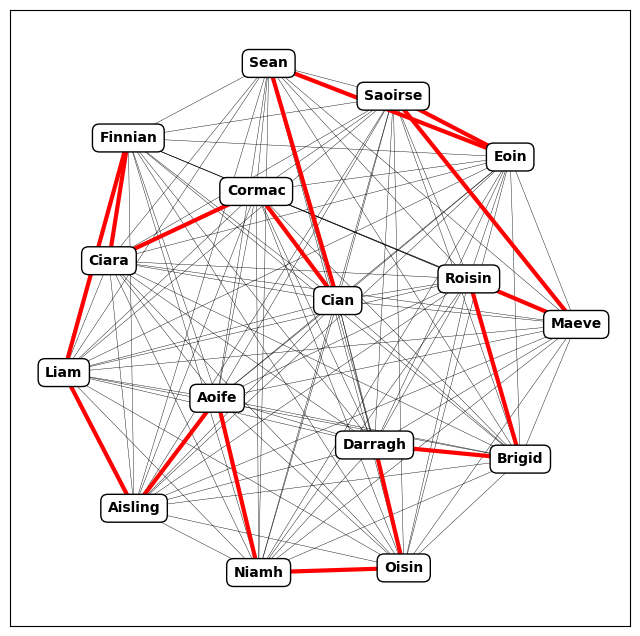

In [29]:

plt.figure(figsize=(8,8))

nx.draw_networkx(G, pos, **options)


for i in range(N):
  plt.scatter(pos[i][0],pos[i][1], s= 200, c='w', zorder =2)
  text_content = names[i]
  plt.text(pos[i][0],pos[i][1], text_content, color='black', ha='center', va='center', fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

contin = True
st_node,finish = 0,0

c = 1

while contin:


  for (i,j),v in U.items():
    if solver.Value(v)>0 and i == st_node and contin:
      x1,y1 = pos[i][0],pos[i][1]
      x2,y2 = pos[j][0],pos[j][1]
      plt.plot([x1,x2],[y1,y2],lw=3,c='r')
      print(names[i],names[j], c)
      st_node = j
      if c>15:
        plt.savefig(f'santa{c}.png', format='png', bbox_inches='tight', dpi=300)
        FILE.download(f'santa{c}.png')
      c+=1
      if j == finish:
        contin = False



# New Section